In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from scipy.stats import chi2
from scipy.stats import norm
import os.path as path
import wget
import os

In [2]:
# Descargamos data
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/*

file = 'Data/data.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Restaurante.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [....................................................................................] 51 / 51File loaded


In [3]:
data = pd.read_csv(Path_,sep=',')
data

,Precio1,Precio2,Precio3
0,38,55,52
1,39,65,55
2,43,60,63


In [10]:
f = np.array(data,np.float64)
f

array([[38., 55., 52.],
       [39., 65., 55.],
       [43., 60., 63.]])

In [11]:
N = np.sum(f)
N

470.0

In [12]:
f = f/N
f

array([[0.08085106, 0.11702128, 0.1106383 ],
       [0.08297872, 0.13829787, 0.11702128],
       [0.09148936, 0.12765957, 0.13404255]])

In [18]:
g = np.sum(f,axis=1)
h = np.sum(f,axis=0)

In [19]:
g

array([0.30851064, 0.33829787, 0.35319149])

In [20]:
h

array([0.25531915, 0.38297872, 0.36170213])

In [21]:
po = np.zeros_like(f)
po

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
for i in range(3):
    for j in range(3):
        po[i,j] = g[i]*h[j]

In [23]:
po

array([[0.07876867, 0.11815301, 0.11158895],
       [0.08637392, 0.12956089, 0.12236306],
       [0.09017655, 0.13526483, 0.12775011]])

In [24]:
f

array([[0.08085106, 0.11702128, 0.1106383 ],
       [0.08297872, 0.13829787, 0.11702128],
       [0.09148936, 0.12765957, 0.13404255]])

In [25]:
fo = f*N
fe = po*N

In [27]:
fo

array([[38., 55., 52.],
       [39., 65., 55.],
       [43., 60., 63.]])

In [28]:
fe

array([[37.0212766 , 55.53191489, 52.44680851],
       [40.59574468, 60.89361702, 57.5106383 ],
       [42.38297872, 63.57446809, 60.04255319]])

In [29]:
def GetChi2(x,y):
    return np.sum( (x-y)**2/y )

In [30]:
ObsChi2 = GetChi2(fo,fe)
ObsChi2

0.8396477840721938

In [31]:
df = 4

In [32]:
# Valor critico
CriChi2 = chi2.ppf(0.95,df=df)
CriChi2

9.487729036781154

In [33]:
x = np.linspace(0,20,50)
y = chi2.pdf(x,df=df)

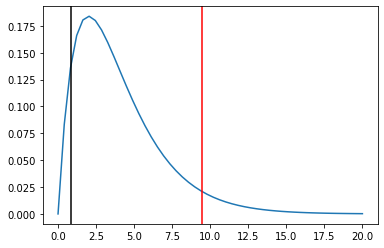

In [37]:
plt.plot(x,y)
plt.axvline(x=ObsChi2,color='k')
plt.axvline(x=CriChi2,color='r')

In [43]:
CL = chi2.cdf(ObsChi2,df=df)

In [44]:
pvalue = 1 - CL

In [45]:
pvalue

0.9330550769215175